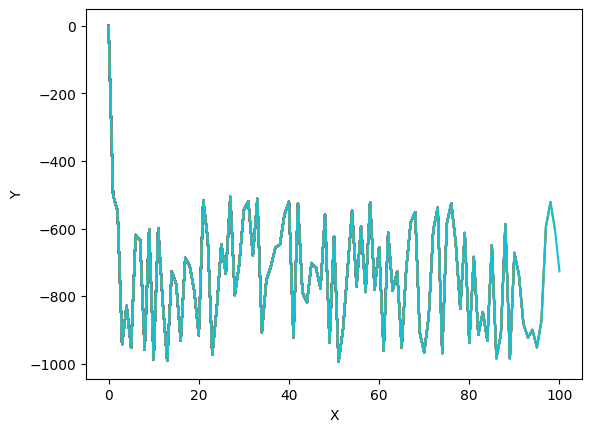

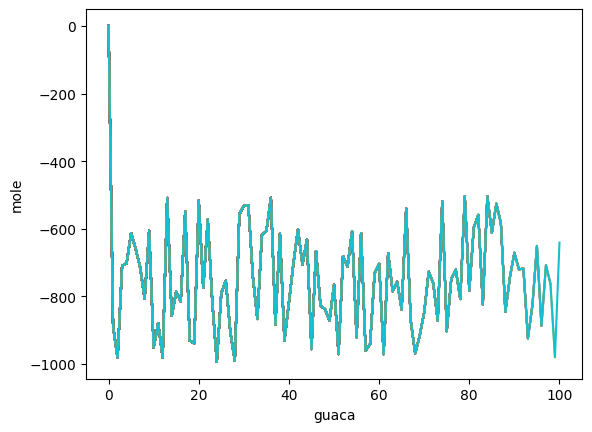

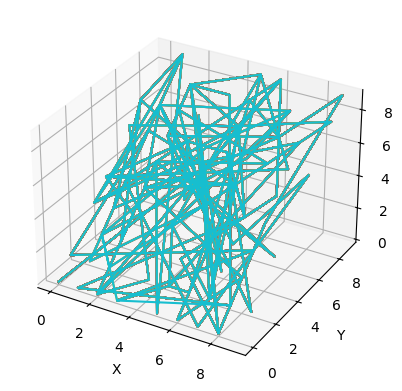

In [34]:
import sys
if not ('numpy' in sys.modules and 'matplotlib' in sys.modules):
    !{sys.executable} -m pip install numpy
    !{sys.executable} -m pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt 
import random
import time 

plt.ion() #Interactive ON

plotID = 0
plotDict = {}
interval = 1

class plotObject:
    storedID = 0
    figData = [[0], [0]]

    def __init__(self, key: str, projection_3d, x_axis, y_axis, z_axis):
        global plotID
        global plotDict
        plotID += 1
        self.storedID = plotID
        if not projection_3d:
            self.figData = [[0], [0]]
            fig2D = plt.figure(plotID)
        else:
            self.figData = [[0], [0], [0]]
            fig3D = plt.figure(plotID).add_subplot(projection='3d')
            fig3D.set_zlabel(z_axis)
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plotDict[key] = self

    def default2D(key: str): 
        return plotObject(key, False, "X", "Y", "")
    
    def default3D(key: str): 
        return plotObject(key, True, "X", "Y", "Z")

def tick_2d(key, data_input):
    figureID = plotDict[key].storedID
    data = plotDict[key].figData
    plt.figure(figureID)

    prev_time = data[0][len(plotDict[key].figData[0])-1] #Log previous time
    data[0].append(prev_time + interval) #X-Data (Previous time + tick interval)
    data[1].append(data_input) #Y-Data (The actual data)
    plt.plot(data[0], data[1]) 

def tick_3d(key, data_input_x, data_input_y, data_input_z):
    figureID = plotDict[key].storedID
    data = plotDict[key].figData
    plt.figure(figureID)

    data[0].append(data_input_x) #X
    data[1].append(data_input_y) #Y
    data[2].append(data_input_y) #Z
    plt.plot(data[0], data[1], data[2]) 

plotObject.default2D("KEY2D")
plotObject("KEY2D2", False, "guaca", "mole", "")
plotObject.default3D("KEY3D")

for i in range(100):
    tick_2d("KEY2D", random.randrange(-1000, -500))
    tick_2d("KEY2D2", random.randrange(-1000, -500))
for i in range(100):
    tick_3d("KEY3D", random.randrange(-0, 10), random.randrange(-0, 10), random.randrange(-0, 10))
